In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y')

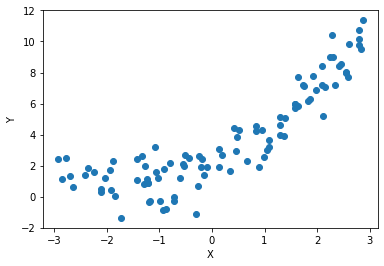

In [3]:
## Generate non linear Dataset
X=6* np.random.rand(100,1)-3
Y=0.5*(X**2)+1.5*X+2+np.random.randn(100,1)
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")

In [4]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
## Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Linear_reg=LinearRegression()
Linear_reg.fit(X_train,Y_train)
Y_pred=Linear_reg.predict(X_test)

print("Coefficient=",Linear_reg.coef_)
print("Intercept=",Linear_reg.intercept_)

mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)
print("R2 score=",r2_score(Y_test,Y_pred))

Coefficient= [[1.58150046]]
Intercept= [3.35144642]
Mean Absolute Error= 1.1613808567652444
Mean Squared Error= 2.3961775979510223
Root Mean Squared Error= 1.5479591719263859
R2 score= 0.804656143288522


As the data is having non linear relationship fitting a straight line is not giving that much accuracy

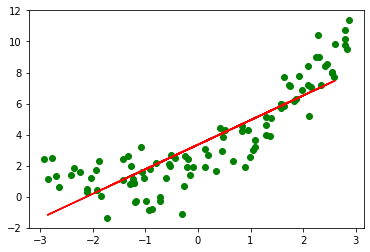

In [6]:
plt.scatter(X,Y,color='g')
plt.plot(X_test,Y_pred,'r')

This is how linear regression looks like for simple linear regression which is same as polynomial regression with degree 1.

In [7]:
## Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

Polynomial Regression with degree 2 equation is --> h(x)=Beta_0 * (1) +Beta_1*X1 + Beta_2* X1**2

By doing include_bias=True we are considering 1 that is being multiplied with Beta_0 in calculation

In [8]:
## The output is 3 things from above equation (1,X1 and X1**2) which are being multiplied with Beta's.
X_train_poly[0]

array([1.        , 0.94248084, 0.88827013])

In [9]:
## After transforming the data apply same linear regression with transformed data
poly_Linear_reg=LinearRegression()
poly_Linear_reg.fit(X_train_poly,Y_train)
Y_pred=poly_Linear_reg.predict(X_test_poly)

print("Coefficient=",poly_Linear_reg.coef_)
print("Intercept=",poly_Linear_reg.intercept_)

mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)
print("R2 score=",r2_score(Y_test,Y_pred))

Coefficient= [[0.         1.4655087  0.50023364]]
Intercept= [1.98672595]
Mean Absolute Error= 0.9243768252993798
Mean Squared Error= 1.2202005017774227
Root Mean Squared Error= 1.1046268608799183
R2 score= 0.9005254568015728


Now the accuracy has increased by very good amount. Here we are getting 3 features 1,X1 and X1**2 but initially we had only 1.

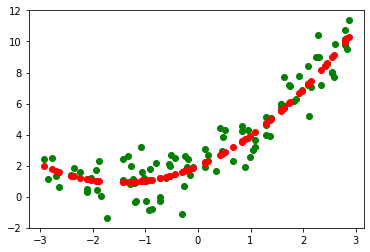

In [10]:
plt.scatter(X,Y,color='g')
plt.scatter(X_train,poly_Linear_reg.predict(X_train_poly),color='r')

This is how polynomial regression is fiiting the non linear data.

In [11]:
## Polynomial with degree 3
## Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_3=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly_3.fit_transform(X_train)
X_test_poly=poly_3.transform(X_test)

In [12]:
## After transforming the data apply same linear regression with transformed data
poly_3_Linear_reg=LinearRegression()
poly_3_Linear_reg.fit(X_train_poly,Y_train)
Y_pred=poly_3_Linear_reg.predict(X_test_poly)

print("Coefficient=",poly_3_Linear_reg.coef_)
print("Intercept=",poly_3_Linear_reg.intercept_)

mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)
print("Root Mean Squared Error=",rmse)
print("R2 score=",r2_score(Y_test,Y_pred))

Coefficient= [[ 0.          1.58775996  0.50370364 -0.02403492]]
Intercept= [1.98155102]
Mean Absolute Error= 0.9698108431340013
Mean Squared Error= 1.278119146318951
Root Mean Squared Error= 1.1305393165737099
R2 score= 0.8958037486068555


In [13]:
## Prediction on new data
X=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X)

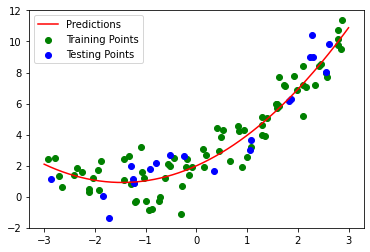

In [14]:
Y_new=poly_Linear_reg.predict(X_new_poly)
plt.plot(X,Y_new,'r',label="Predictions")
plt.scatter(X_train,Y_train,color="g",label="Training Points")
plt.scatter(X_test,Y_test,color="b",label="Testing Points")
plt.legend()

#### PipeLine

In [15]:
from sklearn.pipeline import Pipeline

In [16]:
def polynomial_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)

    poly=PolynomialFeatures(degree=degree,include_bias=True)
    reg=LinearRegression()

    poly_regression=Pipeline([
        ("Poly",poly),
        ('reg',reg)
    ])
    poly_regression.fit(X_train,Y_train)

    Y_pred=poly_regression.predict(X_new)
    #print("Score=",r2_score(Y_test,Y_pred))

    ## Plotting
    plt.scatter(X_train,Y_train,color='g',label="Training Points")
    plt.scatter(X_test,Y_test,color='b',label="Testing Points")
    plt.plot(X_new,Y_pred,'r',label='Prediction Points')
    plt.xlabel("X")
    plt.ylabel("Y")

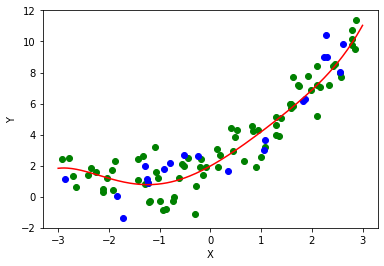

In [17]:
polynomial_regression(5)

Polynomial regression with degree 5 is generalized i.e. not overfitted nor underfitted

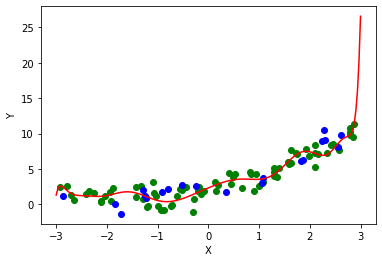

In [18]:
polynomial_regression(15)

polynomial regression with degree 15 is overfitting the points

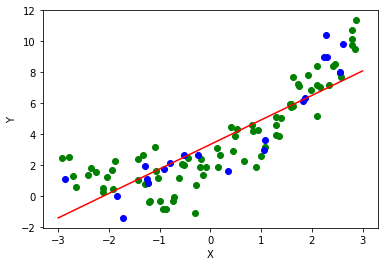

In [19]:
polynomial_regression(1)

polynomial regression with degree 1 is clear case of underfitting

In [20]:
## 3D Polynomial regression
x=np.random.rand(100,1)-2.8
y=np.random.rand(100,1)-2.8

z= x**2 + y**2 + 0.2 *x + 0.2 *y+ 0.1*x*y+2 +np.random.randn(100,1)
#z=x^2+y^2+0.2^x+0.2^y*0.1xy+2

In [21]:
## Visualize
import plotly.express as px

## Import iris data
df=px.data.iris()

fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [22]:
## Lets fit multiple linear regression 
lr=LinearRegression()
#x.shape--> 100,1
#y.shape-->100,1
#np.array([x,y]).shape--> 2,100,1
#np.array([x,y]).reshape(100,2).shape-->100,2
lr.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()

The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB

In [23]:
## Generate new data
x_input=np.linspace(x.min(),x.max(),10) # Get 10 numbers Ranging between min x and max x
y_input=np.linspace(y.min(),y.max(),11) # Get 10 numbers Ranging between min y  and max y

#x_input.shape#-->(10,)
#y_input.shape#-->(11,)

xGrid,yGrid=np.meshgrid(x_input,y_input)
#xGrid.shape#-->(11,10)
#yGrid.shape#-->(11,10)
#xGrid

ravel creates a flattened array of grid.

numpy. vstack() function is used to stack arrays vertically (row-wise) to make a single array. It takes a sequence of arrays and joins them vertically. This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been reshaped to (1,N)

In [24]:
#xGrid.ravel().shape-->(110,)
#yGrid.ravel().shape-->(110,)

#xGrid.ravel().reshape(1,110)
final=np.vstack((xGrid.ravel().reshape(1,110),yGrid.ravel().reshape(1,110))).T
final[:10]
##final.shape--> (100,2)

array([[-2.78690073, -2.79293231],
       [-2.67776682, -2.79293231],
       [-2.56863291, -2.79293231],
       [-2.45949899, -2.79293231],
       [-2.35036508, -2.79293231],
       [-2.24123116, -2.79293231],
       [-2.13209725, -2.79293231],
       [-2.02296334, -2.79293231],
       [-1.91382942, -2.79293231],
       [-1.80469551, -2.79293231]])

In [25]:
z_final=lr.predict(final).reshape(11,10)
#z_final.shape-->(110,1)

In [26]:
## Visualize multiple linear regression
import plotly.graph_objects as go

fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

The result here is not much good as the data is having non linear relationship

In [31]:
## Lets apply polynomial regression
x_multi=np.array([x,y]).reshape(100,2)
x_multi[:5]

array([[-1.97267457, -2.03611381],
       [-2.0772572 , -2.40033206],
       [-2.30623351, -2.22502469],
       [-2.19359535, -2.03532936],
       [-2.12086983, -2.04475367]])

In [57]:
poly=PolynomialFeatures(degree=6)
x_multi_trans=poly.fit_transform(x_multi)

In [58]:
print("Input=",poly.n_input_features_)
print("Output=",poly.n_output_features_)
print("Powers=",poly.powers_)

Input= 2
Output= 28
Powers= [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



For Degree=2--->We have 2 input features x and y. The polynomial regression is extracting 6 terms from 2 inputs based on powers.
Term 1- x^0 and y^0---
Term 2- x^1 and y^0---
Term 3- x^0 and y^1---
Term 4- x^2 and y^0---
Term 5- x^1 and y^1---
Term 6- x^0 and y^2---
The addition of powers will be <=2. Hence we dont have x^2 and y^2 as this will make polynomial of degree 4

In [59]:
x_multi_trans.shape

(100, 28)

In [60]:
## Now applying linear regression on transformed x
lr=LinearRegression()
lr.fit(x_multi_trans,z)

LinearRegression()

In [61]:
x_test_multi=poly.transform(final)

In [62]:
z_final=lr.predict(x_multi_trans).reshape(10,10)

In [63]:
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()